In [224]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.vector_ar.vecm import coint_johansen
from sklearn import covariance
from sklearn.linear_model import LassoCV
from sklearn.linear_model import LinearRegression
import networkx as nx
from exchange.ftx.client import FtxClient

from datetime import datetime, timedelta

import warnings
warnings.filterwarnings('ignore')

client = FtxClient()


In [285]:
minimum_date = datetime.fromisoformat('2022-03-01 00:00:00+00:00')
maximum_date = datetime.fromisoformat('2022-03-14 00:00:00+00:00')
minimum_volume = 1000000
resolution = '5m'
futures = client.get_futures()
perps = []
for future in futures:
    if 'PERP' in future['name'] and future['volumeUsd24h'] > minimum_volume:
        perps.append(future['name'])

#perps = ['BTC-PERP', 'ETH-PERP', 'SOL-PERP', 'AVAX-PERP', 'MATIC-PERP', 'XRP-PERP', 'BNB-PERP', 'AAVE-PERP', 'ADA-PERP', 'LINK-PERP', 'DOT-PERP', 'FTT-PERP', 'DOGE-PERP', 'SAND-PERP', 'LTC-PERP', 'TRX-PERP', 'BCH-PERP', 'AXS-PERP', 'EOS-PERP', 'SNX-PERP', 'SUSHI-PERP', 'ETC-PERP', 'ALT-PERP', 'SHIT-PERP', 'DEFI-PERP', 'ZEC-PERP', 'XMR-PERP', 'PRIV-PERP']
#perps = ['ZEC-PERP', 'XMR-PERP']

ohlc = {}
prices = {}
for perp in perps:
    data = []
    try:
        data = pd.read_parquet('C:/Users/Walid/Desktop/Workspace/data/{}_{}.parquet.gzip'.format(perp, resolution))
    except:
        print('Cannot find {} data'.format(perp))
    
    if len(data) > 0:
        data['startTime'] = data['startTime'].apply(lambda x: datetime.fromisoformat(x))
        ohlc[perp] = data.set_index('startTime')
        prices[perp] = ohlc[perp]['close']

prices_df = pd.DataFrame(prices)[minimum_date:maximum_date].T.dropna().T
prices_df

Cannot find ICP-PERP data
Cannot find RSR-PERP data
Cannot find RUNE-PERP data
Cannot find THETA-PERP data


,1INCH-PERP,AAVE-PERP,ADA-PERP,AGLD-PERP,ALGO-PERP,ALICE-PERP,ALT-PERP,AR-PERP,ASD-PERP,ATOM-PERP,...,XEM-PERP,XLM-PERP,XMR-PERP,XRP-PERP,XTZ-PERP,YFI-PERP,YFII-PERP,ZEC-PERP,ZIL-PERP,ZRX-PERP
startTime,,,,,,,,,,,,,,,,,,,,,
2022-03-01 00:00:00+00:00,1.5129,147.18,0.977610,1.2420,0.8732,7.6725,3459.60,32.633,0.22333,31.5045,...,0.10915,0.200150,171.93,0.787850,3.5699,21705.0,2084.00,119.86,0.04376,0.57900
2022-03-01 00:05:00+00:00,1.5129,147.09,0.974855,1.2405,0.8751,7.7600,3456.80,32.507,0.22332,31.6135,...,0.10930,0.200250,171.76,0.786150,3.5689,21695.0,2084.25,119.52,0.04370,0.58125
2022-03-01 00:10:00+00:00,1.5159,147.08,0.973830,1.2440,0.8728,7.7625,3458.50,32.441,0.22391,31.8340,...,0.10915,0.201075,172.24,0.785825,3.5653,21730.0,2091.50,119.25,0.04389,0.58200
2022-03-01 00:15:00+00:00,1.5024,146.89,0.968955,1.2335,0.8689,7.7000,3440.25,32.206,0.22391,31.7050,...,0.10865,0.199575,171.26,0.781800,3.5442,21695.0,2077.75,118.61,0.04353,0.58050
2022-03-01 00:20:00+00:00,1.5100,147.50,0.971710,1.2320,0.8687,7.7150,3442.40,32.250,0.22388,32.2280,...,0.10855,0.199550,171.64,0.782150,3.5421,21715.0,2084.25,118.73,0.04377,0.58325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-13 23:40:00+00:00,1.3074,115.70,0.787315,0.9255,0.6812,5.4800,3029.80,30.296,0.21062,26.2180,...,0.09105,0.176000,175.38,0.759050,2.9090,17970.0,1770.25,154.90,0.03852,0.47325
2022-03-13 23:45:00+00:00,1.3109,116.04,0.789760,0.9260,0.6822,5.5000,3036.15,30.389,0.21062,26.2335,...,0.09130,0.176550,175.81,0.760750,2.9117,17980.0,1774.00,155.60,0.03856,0.47375
2022-03-13 23:50:00+00:00,1.3100,116.04,0.790115,0.9305,0.6815,5.4975,3037.35,30.494,0.21062,26.2715,...,0.09135,0.176650,176.12,0.759975,2.9095,18060.0,1774.75,155.77,0.03860,0.47375


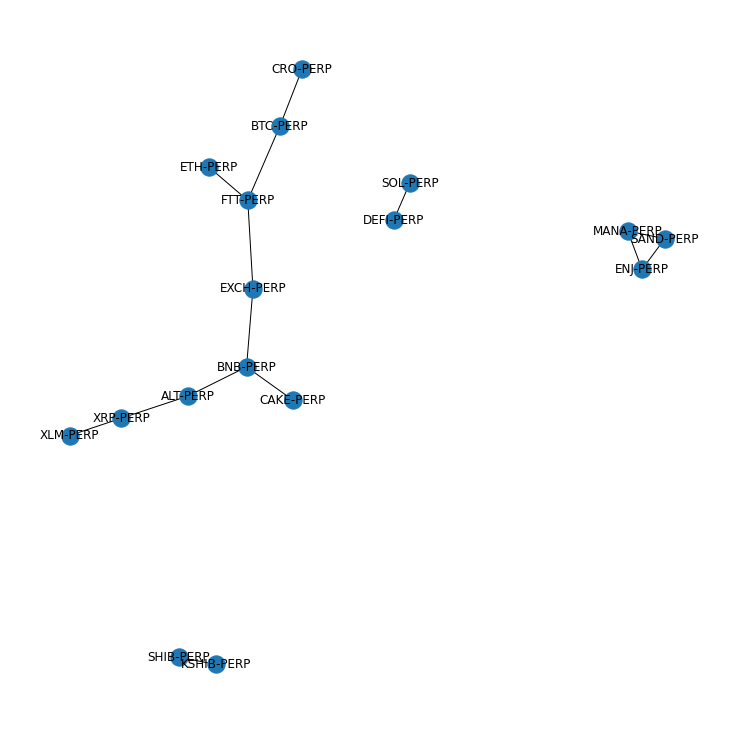

In [287]:
log_returns = np.log1p(prices_df.pct_change())[1:]

edge_model = covariance.GraphicalLassoCV(cv=40)
log_returns /= log_returns.std(axis=0)
edge_model.fit(log_returns)
p = edge_model.precision_

#prepare the matrix for network illustration
p = pd.DataFrame(p, columns=prices_df.columns, index=prices_df.columns)
links = p.stack().reset_index()
links.columns = ['var1', 'var2','value']
links=links.loc[ (abs(links['value']) > 0.10) &  (links['var1'] != links['var2']) ]
#build the graph using networkx lib
G=nx.from_pandas_edgelist(links,'var1','var2', create_using=nx.Graph())
pos = nx.spring_layout(G, k=0.2*1/np.sqrt(len(G.nodes())), iterations=20)
plt.figure(3, figsize=(10, 10))
nx.draw(G, pos=pos)
nx.draw_networkx_labels(G, pos=pos)
plt.show()

<AxesSubplot:title={'center':'MANA-PERP/SAND-PERP spread, coef = 0.911'}, xlabel='startTime'>

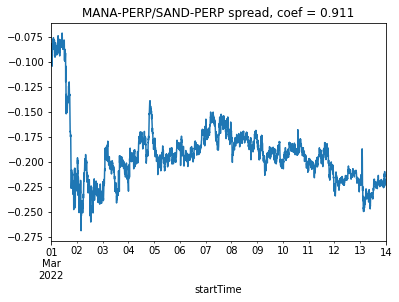

In [344]:
# Study hedge ratio variation of some clusters
perp_a = 'MANA-PERP'
perp_b = 'SAND-PERP'
model = LassoCV()
res = model.fit(log_returns[perp_a].values.reshape(-1,1), log_returns[perp_b].values.reshape(-1,1))
spread = prices_df[perp_a] - res.coef_[0] * prices_df[perp_b]
spread.plot(title='{}/{} spread, coef = {:.3f}'.format(perp_a, perp_b, res.coef_[0]))


In [339]:
price_a = prices_df[perp_a][0]
price_b = prices_df[perp_b][0]
capital = 10000
beta = res.coef_[0]
b_units = (capital*beta)/2 / price_b
a_units = (capital - b_units * price_b) / price_a

print('buy {} units of a and sell {} units of b'.format(a_units, b_units))
([a_units, -b_units] * prices_df[[perp_a, perp_b]])

buy 1892.5314477210663 units of a and sell 1401.7901016776145 units of b


,MANA-PERP,SAND-PERP
startTime,,
2022-03-01 00:00:00+00:00,5444.812975,-4555.187025
2022-03-01 00:05:00+00:00,5436.864343,-4553.645056
2022-03-01 00:10:00+00:00,5445.569988,-4574.321460
2022-03-01 00:15:00+00:00,5387.090766,-4521.263704
2022-03-01 00:20:00+00:00,5408.665624,-4529.464177
...,...,...
2022-03-13 23:40:00+00:00,4253.275176,-3794.856074
2022-03-13 23:45:00+00:00,4265.387377,-3808.663706
2022-03-13 23:50:00+00:00,4265.576630,-3807.822632


<AxesSubplot:xlabel='startTime'>

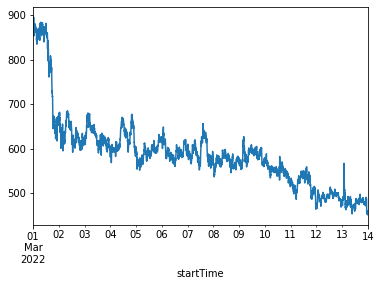

In [342]:
([a_units, -b_units] * prices_df[[perp_a, perp_b]]).sum(axis=1).plot()

0.016222509250213304


<AxesSubplot:xlabel='startTime'>

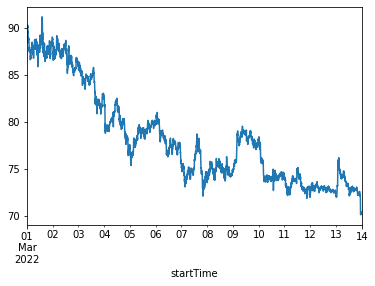

In [347]:
jres = coint_johansen(prices_df[[perp_a, perp_b]], 0, 1)
print(abs(jres.evec[0][1] / jres.evec[0][0]))
(jres.evec[0] * prices_df[[perp_a, perp_b]]).sum(axis=1).plot()

In [346]:
ols = LinearRegression()
ols_res = ols.fit(log_returns[perp_a].values.reshape(-1,1), log_returns[perp_b].values.reshape(-1,1))
ols_res.coef_

array([[0.91194935]])